**Importing libraries**

In [1]:
import tensorflow as tf

print("TensorFlow version:", tf.__version__)
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))

2025-04-26 08:18:52.955213: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745655532.977047     494 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745655532.983898     494 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


TensorFlow version: 2.18.0
Num GPUs Available: 2


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import warnings
warnings.filterwarnings("ignore")

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # Suppresses INFO and WARNING logs 

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
 #   for filename in filenames:
  #      print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**Dataset loading and preprocessing**

In [3]:
#loading datasets
red = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')
white = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=';')

In [4]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
red['type']= 1 #type column added. 1 for red wine & 0 for white wine
white['type'] = 0

wines = pd.concat([red,white], ignore_index=True)# two datasets concatenated
wines.dropna(inplace=True) # missing values dropped

In [6]:
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [7]:
wines.shape #output shows 6497 rows & 13 columns

(6497, 13)

In [8]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


No null values in the dataset

In [9]:
wines.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type'],
      dtype='object')

In [10]:
red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.0
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023,1.0
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569,0.0
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,1.0
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000,1.0
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000,1.0
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000,1.0
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1.0


In [11]:
white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.0
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909,0.0
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639,0.0
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.0
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000,0.0
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000,0.0
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000,0.0
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000,0.0


In [12]:
wines.isnull()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,False,False,False,False,False,False,False,False,False,False,False,False,False
6493,False,False,False,False,False,False,False,False,False,False,False,False,False
6494,False,False,False,False,False,False,False,False,False,False,False,False,False
6495,False,False,False,False,False,False,False,False,False,False,False,False,False


**Plotting Distribution of Alcohol**

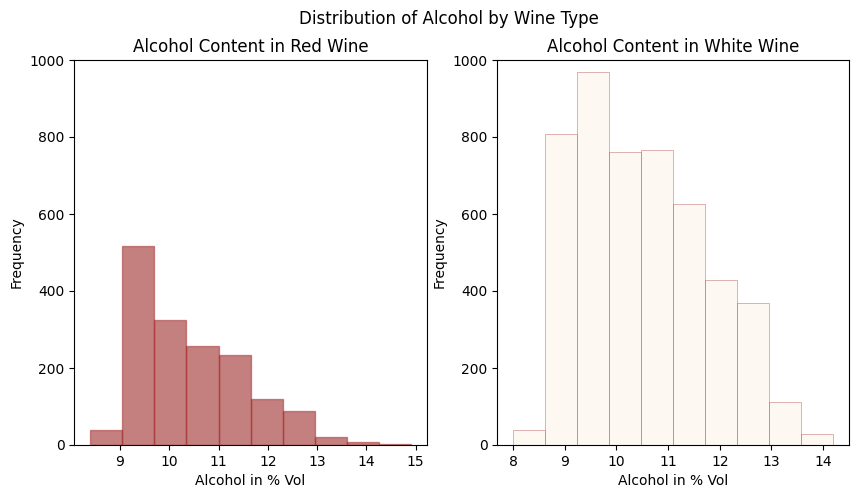

In [13]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].hist(wines[wines['type'] ==1].alcohol, bins=10, facecolor='#8B0000', edgecolor ='brown', alpha=0.5,label='Red wine')
ax[1].hist(wines[wines['type'] ==0].alcohol, bins=10, facecolor='oldlace', edgecolor='brown',lw=0.5, alpha=0.5,label='White wine')

for a in ax:
    a.set_ylim([0,1000])
    a.set_xlabel('Alcohol in % Vol')
    a.set_ylabel('Frequency')

ax[0].set_title('Alcohol Content in Red Wine')
ax[1].set_title('Alcohol Content in White Wine')

fig.suptitle('Distribution of Alcohol by Wine Type')
plt.tight_layout
plt.show()

**Splitting data into training and testing sets**

In [14]:
X = wines.iloc[:, :-1]
y = wines['type']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.34, random_state=45)

**Modeling - Neural Network**

In [15]:
model = Sequential()
model.add(Dense(12, activation='relu', input_dim=12)) # number of features
model.add(Dense(7, activation='relu')) # can do hyperparameter tuning by changing the numbers and fing high accuracy
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

I0000 00:00:1745655537.912197     494 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1745655537.912859     494 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


**Training the model and making predictions**

In [16]:
model.fit(X_train, y_train, epochs=3, batch_size=1, verbose=1)
y_pred = model.predict(X_test)
print("Predictions:", y_pred)

Epoch 1/3


I0000 00:00:1745655539.936414     545 service.cc:148] XLA service 0x7a0cb0006120 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1745655539.936453     545 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1745655539.936457     545 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1745655540.083276     545 cuda_dnn.cc:529] Loaded cuDNN version 90300


 123/4288 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7987 - loss: 0.6486    

I0000 00:00:1745655540.400266     545 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


4288/4288 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.8904 - loss: 0.3052
Epoch 2/3
4288/4288 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9325 - loss: 0.2022
Epoch 3/3
4288/4288 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9471 - loss: 0.1459
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Predictions: [[0.24997407]
 [0.47838587]
 [0.0880883 ]
 ...
 [0.67970926]
 [0.1742835 ]
 [0.01132584]]


**Interpretation**  
The output shows the accuracy improves from 89.04% in the first epoch (1st 4288/4288 samples completed) to 94.71% in the third while the loss decreases from 0.3052 to 0.1459 indicating better performance. The model makes predictions with probabilities close to 0 or 1 where values near 0 indicate white wine and values near 1 indicate red wine. This shows the model’s effective learning and improvement in predicting wine types as training progresses.